# Gene expression cancer RNA-Seq Data Set - Multi-class classification

#### Zhanyang Zhu Zhanyang.Zhu@Gmail.com 10/18/2022 for UCSD Machine Learning Bootcamp Capstone Project 

## Goal: 
>### Train multi-class classification models to determine a cancer type given gene expression data of a patient. 
>### In this exercise, the cancer types are limited to BRCA, KIRC, COAD, LUAD and PRAD, SKCM, THCA, LGG. More cancer types can be included.
>### TCGA Study Abbreviations https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations

### Multi-class classification: 
>#### It is classification with more than two classes. In multi class classification, each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time (https://analyticsindiamag.com/7-types-classification-algorithms/)
>#### K-Nearest Neighbours, Logistic Regression, Naïve Bayes, Stochastic Gradient Descent, Decision Tree, Random Forest, and Support Vector Machine

## Background: 
>### This project was inspired by a similar UCI data set - a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD
>#### https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
 

## Data Selection: 
>### For this UCSD Data Bootcamp projects, I downloaded five data sets from https://www.synapse.org/#!Synapse:syn2812961. All five data sets are Illumina HiSeq RNASeq V2 data collected by unc.edu:
>#### 1. unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - BRCA: Breast invasive carcinoma
>#### 2. unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - COAD: Colon adenocarcinoma
>#### 3. unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv - KIRC: Kidney renal clear cell carcinoma
>#### 4. unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LUAD: Lung adenocarcinoma
>#### 5. unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv - PRAD: Prostate adenocarcinoma
>#### 6. unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv - SKCM: Skin Cutaneous Melanoma
>#### 7. unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv - THCA: Thyroid carcinoma
>#### 8. unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv - LGG: Brain Lower Grade Glioma 

### Data Set Information:

>#### Samples (instances) are stored column-wise. Variables (attributes in rows) of each sample are RNA-Seq gene expression levels measured by illumina HiSeqV2 platform.


### Relevant Papers:

>####  Weinstein, John N., et al. 'The cancer genome atlas pan-cancer analysis project.' Nature genetics 45.10 (2013): 1113-1120.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import time

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
unc_BRCA = pd.read_csv('UNC.EDU/unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_COAD = pd.read_csv('UNC.EDU/unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_KIRC = pd.read_csv('UNC.EDU/unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LUAD = pd.read_csv('UNC.EDU/unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_PRAD = pd.read_csv('UNC.EDU/unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_SKCM = pd.read_csv('UNC.EDU/unc.edu_SKCM_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_THCA = pd.read_csv('UNC.EDU/unc.edu_THCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LGG = pd.read_csv('UNC.EDU/unc.edu_LGG_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])

In [3]:
unc_BRCA.head()

,TCGA-3C-AAAU-01A-11R-A41B-07,TCGA-3C-AALI-01A-11R-A41B-07,TCGA-3C-AALJ-01A-31R-A41B-07,TCGA-3C-AALK-01A-11R-A41B-07,TCGA-4H-AAAK-01A-12R-A41B-07,TCGA-5L-AAT0-01A-12R-A41B-07,TCGA-5L-AAT1-01A-12R-A41B-07,TCGA-5T-A9QA-01A-11R-A41B-07,TCGA-A1-A0SB-01A-11R-A144-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SE-01A-11R-A084-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SG-01A-11R-A144-07,TCGA-A1-A0SH-01A-11R-A084-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,TCGA-A1-A0SM-01A-11R-A084-07,TCGA-A1-A0SN-01A-11R-A144-07,TCGA-A1-A0SO-01A-22R-A084-07,TCGA-A1-A0SP-01A-11R-A084-07,TCGA-A1-A0SQ-01A-21R-A144-07,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04P-01A-31R-A034-07,TCGA-A2-A04Q-01A-21R-A034-07,TCGA-A2-A04R-01A-41R-A109-07,TCGA-A2-A04T-01A-21R-A034-07,TCGA-A2-A04U-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A04W-01A-31R-A115-07,TCGA-A2-A04X-01A-21R-A034-07,TCGA-A2-A04Y-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0CL-01A-11R-A115-07,TCGA-A2-A0CM-01A-31R-A034-07,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CP-01A-11R-A034-07,TCGA-A2-A0CQ-01A-21R-A034-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0CS-01A-11R-A115-07,TCGA-A2-A0CT-01A-31R-A056-07,TCGA-A2-A0CU-01A-12R-A034-07,TCGA-A2-A0CV-01A-31R-A115-07,TCGA-A2-A0CW-01A-21R-A115-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A0CY-01A-12R-A034-07,TCGA-A2-A0CZ-01A-11R-A034-07,TCGA-A2-A0D0-01A-11R-A00Z-07,TCGA-A2-A0D1-01A-11R-A034-07,TCGA-A2-A0D2-01A-21R-A034-07,...,TCGA-OL-A5D6-01A-21R-A27Q-07,TCGA-OL-A5D7-01A-11R-A27Q-07,TCGA-OL-A5D8-01A-11R-A27Q-07,TCGA-OL-A5DA-01A-11R-A27Q-07,TCGA-OL-A5RU-01A-11R-A28M-07,TCGA-OL-A5RV-01A-12R-A28M-07,TCGA-OL-A5RW-01A-11R-A28M-07,TCGA-OL-A5RX-01A-11R-A28M-07,TCGA-OL-A5RY-01A-21R-A28M-07,TCGA-OL-A5RZ-01A-11R-A28M-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-OL-A66H-01A-11R-A29R-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-OL-A66J-01A-11R-A29R-07,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-OL-A66L-01A-12R-A31O-07,TCGA-OL-A66N-01A-12R-A31O-07,TCGA-OL-A66O-01A-11R-A31O-07,TCGA-OL-A66P-01A-11R-A31O-07,TCGA-OL-A6VO-01A-12R-A33J-07,TCGA-OL-A6VQ-01A-12R-A41B-07,TCGA-OL-A6VR-01A-32R-A33J-07,TCGA-OL-A97C-01A-32R-A41B-07,TCGA-PE-A5DC-01A-12R-A27Q-07,TCGA-PE-A5DD-01A-12R-A27Q-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-PL-A8LX-01A-11R-A41B-07,TCGA-PL-A8LY-01A-11R-A41B-07,TCGA-PL-A8LZ-01A-31R-A36F-07,TCGA-S3-A6ZF-01A-32R-A32P-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-A6ZH-01A-22R-A32P-07,TCGA-S3-AA0Z-01A-11R-A41B-07,TCGA-S3-AA10-01A-21R-A41B-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-S3-AA12-01A-11R-A41B-07,TCGA-S3-AA14-01A-11R-A41B-07,TCGA-S3-AA15-01A-11R-A41B-07,TCGA-S3-AA17-01A-11R-A41B-07,TCGA-UL-AAZ6-01A-11R-A41B-07,TCGA-UU-A93S-01A-21R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-WT-AB41-01A-11R-A41B-07,TCGA-WT-AB44-01A-11R-A41B-07,TCGA-XX-A899-01A-11R-A36F-07,TCGA-XX-A89A-01A-11R-A36F-07,TCGA-Z7-A8R5-01A-42R-A41B-07,TCGA-Z7-A8R6-01A-11R-A41B-07
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0203,0.0000,0.0000,0.0000,0.0000,0.0000,0.4618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
?|100133144,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,0.0000,1.4644,15.3396,9.5178,10.0370,10.2517,6.0625,1.6902,3.7905,1.6424,50.5641,6.5562,12.5818,12.5687,11.7293,0.5769,5.3011,1.2241,1.1801,3.6258,16.6878,0.0000,4.5142,1.3076,1.4779,9.4446,0.9980,10.7672,19.7115,

In [4]:
# transpose the data to give samples in row and features in column
unc_BRCA_t = unc_BRCA.T
unc_COAD_t = unc_COAD.T
unc_KIRC_t = unc_KIRC.T
unc_LUAD_t = unc_LUAD.T
unc_PRAD_t = unc_PRAD.T
unc_SKCM_t = unc_SKCM.T
unc_THCA_t = unc_THCA.T
unc_LGG_t = unc_LGG.T
#
# add label for each data set:
#
unc_BRCA_t[['label']] = 'BRCA'
unc_COAD_t[['label']] = 'COAD'
unc_KIRC_t[['label']] = 'KIRC'
unc_LUAD_t[['label']] = 'LUAD'
unc_PRAD_t[['label']] = 'PRAD'
unc_SKCM_t[['label']] = 'SKCM'
unc_THCA_t[['label']] = 'THCA'
unc_LGG_t[['label']] = 'LGG'
# combine the data sets together:
#
unc_mix8 = pd.concat([unc_BRCA_t, unc_COAD_t, unc_KIRC_t, unc_LUAD_t, unc_PRAD_t, unc_SKCM_t, unc_THCA_t, unc_LGG_t])

In [5]:
print("Number of samples: ")
print('  BRCA=' + str(len(unc_BRCA_t)))
print('  COAD= ' + str(len(unc_COAD_t)))
print('  KIRC= ' + str(len(unc_KIRC_t)))
print('  LUAD= ' + str(len(unc_LUAD_t)))
print('  PRAD= ' + str(len(unc_PRAD_t)))
print('  SKCM= ' + str(len(unc_SKCM_t)))
print('  THCA= ' + str(len(unc_THCA_t)))
print('  LGG= ' + str(len(unc_LGG_t)))
print(' total='+str(len(unc_mix8)))

Number of samples: 
  BRCA=1218
  COAD= 329
  KIRC= 606
  LUAD= 576
  PRAD= 550
  SKCM= 474
  THCA= 572
  LGG= 534
 total=4859


Text(0, 0.5, '# of samples')

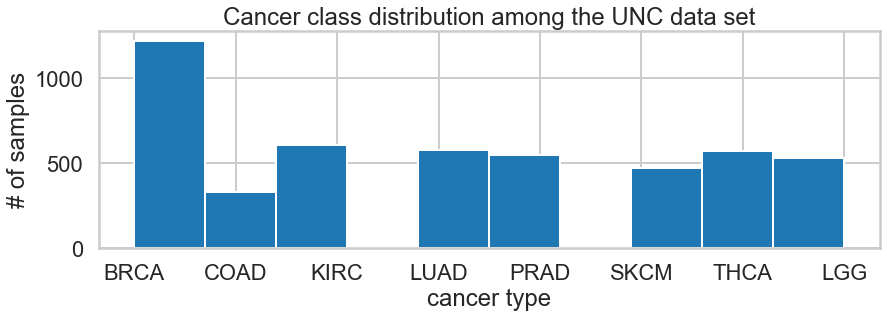

In [6]:
# Cancer class distribution among the UNC data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC data set')
plt.hist(unc_mix8.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [7]:
unc_mix8.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,...,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.00000,4859.000000,4859.000000,4859.000000
mean,0.019137,8.804371,9.946737,126.202266,881.626507,0.000055,243.665617,0.583563,0.210954,0.006088,4.445372,1.50385,6.734141,0.602679,0.288103,0.005802,0.002116,0.023938,57.963724,633.289676,12.209368,18.845937,396.880092,0.000098,1.118261,1.235998,64.913933,714.787183,46.546501,141.111525,34.493871,67.401479,122.210317,124.103023,20654.74843,446.453854,3.495624,0.338613,761.546492,7.370175,850.048691,1.138926,1.433994,0.187612,24.329327,169.941230,1121.267040,1187.212750,2675.482088,1.05999,...,588.455676,599.575475,0.112958,7.642420,5.051350,202.271167,0.894551,1.019641,0.169155,18.641693,984.498210,1374.102206,71.268157,278.418448,1.018597,42.518409,191.685804,126.052426,1412.911593,18.088875,64.677656,243.920000,117.654315,36.683975,470.439371,262.636157,3.631349,68.695170,1.789870,293.085822,0.316981,123.967192,420.125325,285.435906,465.377857,324.885714,163.025594,395.572462,325.013842,511.209529,62.667747,434.805875,1100.636202,53.844874,1036.682788,3831.068673,1352.70052,811.829277,209.243054,0.087035
std,0.101665,8.114689,9.138943,63.548653,367.781962,0.003839,220.551222,0.748920,1.984130,0.266593,79.486604,6.71785,4.081106,3.018727,2.082659,0.057160,0.041821,0.202317,188.067339,567.580314,11.990903,29.095458,468.723886,0.006836,10.481889,2.752970,381.017641,359.533899,73.903495,242.660197,96.370751,357.675409,170.439389,826.450461,26432.60218,478.472530,46.515409,1.779301,250.449584,32.726836,647.981709,13.208353,78.394415,0.692273,188.108855,207.734384,543.700783,706.016184,789.809051,2.95701,...,371.669106,674.927490,0.773602,28.261632,104.228115,187.867821,11.260629,20.191951,0.427269,296.425059,401.8

In [8]:
unc_mix8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4859 entries, TCGA-3C-AAAU-01A-11R-A41B-07 to TCGA-WY-A85E-01A-11R-A36H-07
Columns: 20532 entries, ?|100130426 to label
dtypes: float64(20531), object(1)
memory usage: 761.2+ MB


C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_4992\248007343.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unc_mix8.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()


Text(0, 0.5, 'gene expression mean value')

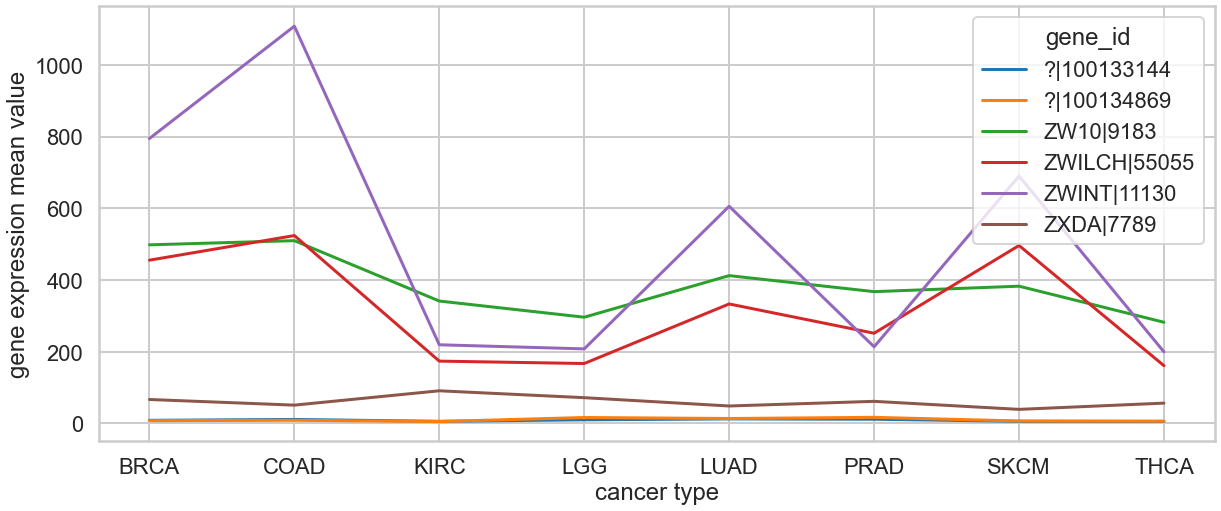

In [9]:
# gene expression mean by cancer type for gene ids - '?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'
plt.rcParams["figure.figsize"] = (20,8)
unc_mix8.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()
plt.xlabel("cancer type")
plt.ylabel("gene expression mean value")

>#### In the plot above, we can see the 'ZWINT|11130' gene (the purple line) shows big mean changes for the five cancer types.

>#### Feature selections:  mean expression level for each cancer type?  the minimal of the means no less than X? 

In [10]:
unc_mix8.columns = unc_mix8.columns.str.replace('\?\|', 'NA|')

C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_4992\746091344.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  unc_mix8.columns = unc_mix8.columns.str.replace('\?\|', 'NA|')


In [11]:
unc_mix8.head()

gene_id,NA|100130426,NA|100133144,NA|100134869,NA|10357,NA|10431,NA|136542,NA|155060,NA|26823,NA|280660,NA|317712,NA|340602,NA|388795,NA|390284,NA|391343,NA|391714,NA|404770,NA|441362,NA|442388,NA|553137,NA|57714,NA|645851,NA|652919,NA|653553,NA|728045,NA|728603,NA|728788,NA|729884,NA|8225,NA|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,label
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.076,0.0,1187.010,0.0000,0.0000,0.0,1.7233,0.3447,4.1359,0.0000,0.6893,0.0,0.0,0.0,3.7912,820.977,124.4220,25.8494,289.513,0.0,0.0,0.0000,109.6020,458.396,40.6697,197.090,0.0000,0.0000,102.9630,1.3786,5798.37,68.2424,8.6165,0.3447,649.337,1.3786,1087.400,0.0,0.0000,0.0,0.0000,5.5145,1300.40,517.333,2053.13,0.3447,...,741.706,0.0,3.7912,0.0000,411.791,0.0000,0.3447,1.034,53.7668,879.225,2504.080,72.0337,421.862,2.7573,128.1790,141.6550,225.062,132.349,0.3447,158.8880,253.510,300.887,38.2571,960.220,582.473,0.3447,32.3979,1.0340,431.513,0.3447,180.2570,489.416,454.9500,621.764,194.108,89.956,430.824,415.824,931.957,129.5920,1007.780,1658.500,258.4940,1208.370,3507.25,1894.930,1180.460,1.7233,0.0,BRCA
TCGA-3C-AALI-01A-11R-A41B-07,0.0000,9.2659,17.3790,69.7553,563.893,0.0,516.041,1.0875,0.5438,0.0,144.1000,4.8940,1.6313,8.1566,0.5438,0.0,0.0,0.0,0.0000,708.537,142.4690,13.3388,449.701,0.0,0.0,0.0000,3.8064,683.524,29.9076,237.384,0.0000,0.0000,70.8646,4.3502,7571.98,157.6940,0.5438,0.0000,887.983,35.3453,836.324,0.0,0.0000,0.0,1.0875,24.4698,3541.05,848.287,2979.88,2.1751,...,373.573,0.0,30.4513,4.3502,439.222,0.5438,2.1751,0.000,3.2626,566.068,627.656,62.5340,349.647,0.0000,58.2164,91.8978,174.551,1549.760,18.4883,27.7325,698.521,197.390,7.0691,588.363,236.542,0.0000,127.7870,4.3502,507.341,0.0000,139.2060,475.802,113.6490,242.523,217.134,105.492,340.402,1161.330,965.198,59.8151,448.613,1343.120,198.4770,603.589,5504.62,1318.650,406.743,926.5910,0.0,BRCA
TCGA-3C-AALJ-01A-31R-A41B-07,0.9066,11.6228,9.2294,154.2970,1360.830,0.0,592.022,0.0000,0.0000,0.0,0.0000,2.7199,2.7199,0.0000,0.0000,0.0,0.0,0.0,0.9066,391.659,34.4515,0.0000,1100.630,0.0,0.0,0.9066,0.0000,657.298,22.6655,423.237,0.9066,0.0000,161.2600,0.0000,8840.40,573.8890,0.0000,0.0000,723.481,2.7199,1533.090,0.0,1.8132,0.0,0.9066,53.4905,1360.83,568.450,2291.93,1.8132,...,257.480,0.0,2.7199,0.0000,334.506,0.0000,0.0000,0.000,117.8600,1125.110,1951.210,35.3581,470.535,0.0000,38.2684,99.7280,110.607,2225.750,112.4210,52.5839,282.865,138.713,46.2375,514.053,268.359,0.0000,62.5567,0.0000,352.675,0.0000,81.5956,485.947,180.4170,506.800,164.234,235.721,304.624,305.422,2531.280,35.3581,533.998,768.812,331.8220,532.185,5458.75,942.883,509.519,35.3581,0.0,BRCA
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8640,865.536,0.0,552.751,0.4137,0.0000,0.0,0.0000,2.0687,4.5511,0.0000,0.0000,0.0,0.0,0.0,0.0000,458.006,15.7220,0.0000,406.289,0.0,0.0,1.2412,34.7538,786.512,54.1994,191.018,0.0000,0.0000,62.5072,1.6549,10960.20,506.4130,0.0000,0.0000,776.996,0.0000,858.088,0.0,0.0000,0.0,2.8962,57.0956,1683.49,727.762,2762.52,0.4137,...,330.161,0.0,1.2412,1.6549,127.017,0.4137,0.0000,0.000,9.1022,780.306,1195.830,61.2329,364.501,0.8275,33.4506,211.8330,163.012,1276.380,6.206

In [12]:
# plt.plot(unc_mix8.mean(numeric_only=True))
# plt.title('Mean Gene Expression Values')

In [13]:
# unc_mix8.max(numeric_only=True)

In [14]:
# plt.title("Max Gene Expression Value")
# plt.plot(unc_mix8.max(numeric_only=True))

In [15]:
# plt.title("Gene Expression STD")
# plt.plot(unc_mix8.std(numeric_only=True))

In [16]:
# sum(unc_mix8.max(numeric_only=True) < 10)

## Make a smaller data set to try multiple algorithms:

In [17]:
# here you get .50 % of the rows
unc_mix_small = unc_mix8.sample(frac = 0.4, random_state=888)

In [18]:
### generate data frame profile:
# unc_mix_small_profile = ProfileReport(unc_mix_small, title="unc_mix_small Data Profiling Report")

In [19]:
## Take too long to compute
# unc_mix_small_profile.to_widgets()

In [20]:
## Take too long to compute
# unc_mix_small_profile.to_notebook_iframe()

Text(0, 0.5, '# of samples')

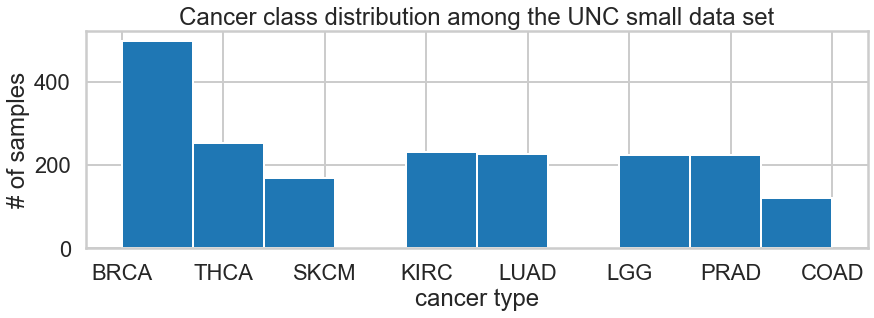

In [21]:
# Cancer class distribution among the UNC "small" data set
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Cancer class distribution among the UNC small data set')
plt.hist(unc_mix_small.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [22]:
unc_mix_small_label = unc_mix_small.pop('label')
unc_mix_small_label.head()

TCGA-A7-A26H-01A-11R-A169-07    BRCA
TCGA-E8-A2EA-01A-11R-A180-07    THCA
TCGA-FS-A1ZE-06A-11R-A18T-07    SKCM
TCGA-ET-A25P-01A-11R-A16R-07    THCA
TCGA-DA-A1I8-06A-11R-A18T-07    SKCM
Name: label, dtype: object

In [23]:
# unc_mix_small.drop(['label'], axis=1, inplace=True)
unc_mix_small.head()

gene_id,NA|100130426,NA|100133144,NA|100134869,NA|10357,NA|10431,NA|136542,NA|155060,NA|26823,NA|280660,NA|317712,NA|340602,NA|388795,NA|390284,NA|391343,NA|391714,NA|404770,NA|441362,NA|442388,NA|553137,NA|57714,NA|645851,NA|652919,NA|653553,NA|728045,NA|728603,NA|728788,NA|729884,NA|8225,NA|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-A7-A26H-01A-11R-A169-07,0.0,10.3029,7.9739,84.4491,730.809,0.0,161.097,0.7833,0.0000,0.0,0.0000,1.3055,5.7441,0.2611,0.5222,0.0,0.0,0.0,0.5222,1703.920,19.5822,11.9217,285.901,0.0,0.0,0.2611,1.0444,286.684,54.3081,149.770,0.0,0.5222,45.5379,3.1332,9177.51,219.582,0.0000,0.0,599.478,0.0000,720.627,0.0,0.0,0.0000,0.7833,29.2428,1393.990,1553.000,2107.83,0.0000,...,602.872,308.0940,0.0,0.2611,0.2611,182.6190,0.0,0.0,0.0,10.7050,959.791,1848.93,156.6580,353.786,0.0,63.5248,175.7180,117.2250,1074.1500,9.9217,132.3760,109.081,151.697,18.0157,654.308,289.817,0.0000,43.3420,1.3055,256.919,0.0000,86.1619,303.394,197.6500,320.627,118.979,181.7230,594.778,469.608,608.877,74.4125,652.219,1691.91,168.6680,1335.510,2421.93,1087.210,1397.130,46.7363,0.0
TCGA-E8-A2EA-01A-11R-A180-07,0.0,0.0000,2.1055,186.1290,1163.490,0.0,124.224,0.0000,0.0000,0.0,0.4211,0.0000,12.2118,0.0000,0.0000,0.0,0.0,0.0,1.2633,158.754,1.6844,0.4211,382.777,0.0,0.0,0.0000,44.6363,618.170,20.2127,164.434,0.0,0.0000,118.0250,0.0000,10949.30,385.725,0.4211,0.0,869.565,0.0000,665.333,0.0,0.0,0.4211,0.0000,130.9610,1120.540,1296.560,3193.18,0.0000,...,960.943,354.1420,0.0,0.4211,0.0000,135.6860,0.0,0.0,0.0,18.5283,834.614,1493.20,46.7418,416.465,0.0,6.4175,166.3330,157.8780,1901.6700,7.1586,33.2667,210.948,120.434,6.3165,304.032,232.446,4.6321,60.2169,0.8422,310.349,0.0000,157.4900,498.158,369.3020,210.548,533.951,96.8523,335.614,228.133,368.039,27.3713,264.449,955.89,78.7451,1182.860,4377.30,849.353,673.755,184.0190,0.0
TCGA-FS-A1ZE-06A-11R-A18T-07,0.0,16.5449,18.6428,204.1690,498.324,0.0,216.153,1.3405,0.0000,0.0,0.0000,0.3351,5.3619,1.6756,0.0000,0.0,0.0,0.0,0.0000,538.874,6.3673,18.4316,200.737,0.0,0.0,0.6702,0.6702,305.295,0.3351,209.145,0.0,4.0214,41.7627,3.6863,6981.88,66.689,0.0000,0.0,823.391,0.0000,317.359,0.0,0.0,0.0000,7.3727,48.2574,818.700,650.469,2037.53,0.0000,...,284.853,94.8391,0.0,0.0000,0.0000,80.0938,0.0,0.0,0.0,0.6702,1698.390,1592.11,66.3539,119.638,0.0,27.6005,131.7020,104.8660,69.7051,0.3351,113.2710,423.458,211.796,1.6756,442.694,132.373,1.3405,31.8365,0.0000,414.879,0.0000,123.3240,563.673,67.3592,709.115,421.743,77.4129,256.702,373.254,460.791,44.2359,309.316,1113.61,2.6810,1375.000,1690.35,1693.700,1239.610,7.3727,0.0
TCGA-ET-A25P-01A-11R-A16R-07,0.0,9.7368,8.0110,103.1030,603.733,0.0,253.672,1.5300,0.0000,0.0,0.3060,0.0000,7.0379,0.0000,0.0000,0.0,0.0,0.0,3.6720,400.551,12.8519,58.5618,437.271,0.0,0.0,1.5300,0.6120,652.693,12.5459,128.452,0.0,1.2240,134.0090,0.0000,18263.70,324.357,0.3060,0.0,613.525,0.0000,707.466,0.0,0.0,0.0000,0.0000,126.9890,1046.210,1456.240,2701.96,0.6120,...,484.394,340.5750,0.0,2.4480,0.0000,19.5838,0.0,0.0,0.0,155.4470,1063.040,1236.93,160.3430,401.775,0.0,39.1646,296.2060,121.1570,2882.8000,32.1297,74.6634,159.486,125.153,46.2056,358.629,191.554,2.1420,43.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    unc_mix_small, unc_mix_small_label, test_size=0.25, random_state=42)

In [25]:
ulabels = y_train.unique()
ulabels.sort()
ulabels

array(['BRCA', 'COAD', 'KIRC', 'LGG', 'LUAD', 'PRAD', 'SKCM', 'THCA'],
      dtype=object)

### Try 6 most common types of classification algorithms: 
- K-Nearest Neighbours,
- Logistic Regression (Logistic regression, by default, is limited to two-class classification problems), 
- Naïve Bayes, 
- Stochastic Gradient Descent, 
- Decision Tree, 
- Random Forest, and 
- Support Vector Machine

### K-Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier;

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_y_pred=knn.predict(X_test)

In [28]:
knn_a = accuracy_score(y_test, knn_y_pred)
knn_a

0.9506172839506173

In [29]:
knn_r = sklearn.metrics.confusion_matrix(y_test, knn_y_pred)
knn_r

array([[116,   1,   0,   0,   1,   0,   0,   0],
       [  0,  25,   0,   0,   0,   1,   0,   0],
       [  2,   0,  58,   0,   0,   0,   0,   0],
       [  0,   0,   0,  49,   0,   0,   0,   0],
       [  6,   7,   1,   0,  50,   0,   0,   0],
       [  2,   0,   0,   0,   0,  56,   0,   0],
       [  2,   0,   1,   0,   0,   0,  41,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [30]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

        BRCA       0.91      0.98      0.94       118
        COAD       0.76      0.96      0.85        26
        KIRC       0.97      0.97      0.97        60
         LGG       1.00      1.00      1.00        49
        LUAD       0.98      0.78      0.87        64
        PRAD       0.98      0.97      0.97        58
        SKCM       1.00      0.93      0.96        44
        THCA       1.00      1.00      1.00        67

    accuracy                           0.95       486
   macro avg       0.95      0.95      0.95       486
weighted avg       0.96      0.95      0.95       486



### Naïve Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [33]:
nb_a = accuracy_score(y_test, nb_y_pred)
nb_a

0.9917695473251029

In [34]:
nb_r = sklearn.metrics.confusion_matrix(y_test, nb_y_pred)
nb_r

array([[116,   0,   0,   0,   2,   0,   0,   0],
       [  0,  26,   0,   0,   0,   0,   0,   0],
       [  0,   0,  60,   0,   0,   0,   0,   0],
       [  0,   0,   0,  49,   0,   0,   0,   0],
       [  2,   0,   0,   0,  62,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,  44,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [35]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

        BRCA       0.98      0.98      0.98       118
        COAD       1.00      1.00      1.00        26
        KIRC       1.00      1.00      1.00        60
         LGG       1.00      1.00      1.00        49
        LUAD       0.97      0.97      0.97        64
        PRAD       1.00      1.00      1.00        58
        SKCM       1.00      1.00      1.00        44
        THCA       1.00      1.00      1.00        67

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### Stochastic Gradient Descent

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

In [38]:
sgd_a = accuracy_score(y_test, sgd_y_pred)
sgd_a

0.9938271604938271

In [39]:
sgd_r = sklearn.metrics.confusion_matrix(y_test, sgd_y_pred)
sgd_r

array([[117,   0,   0,   0,   1,   0,   0,   0],
       [  0,  25,   0,   0,   1,   0,   0,   0],
       [  0,   0,  60,   0,   0,   0,   0,   0],
       [  0,   0,   0,  49,   0,   0,   0,   0],
       [  0,   0,   0,   0,  63,   0,   1,   0],
       [  0,   0,   0,   0,   0,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,  44,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [40]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

        BRCA       1.00      0.99      1.00       118
        COAD       1.00      0.96      0.98        26
        KIRC       1.00      1.00      1.00        60
         LGG       1.00      1.00      1.00        49
        LUAD       0.97      0.98      0.98        64
        PRAD       1.00      1.00      1.00        58
        SKCM       0.98      1.00      0.99        44
        THCA       1.00      1.00      1.00        67

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier(max_depth=20, random_state=101, max_features = None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


In [43]:
from sklearn import tree
# tree.plot_tree(dtree)

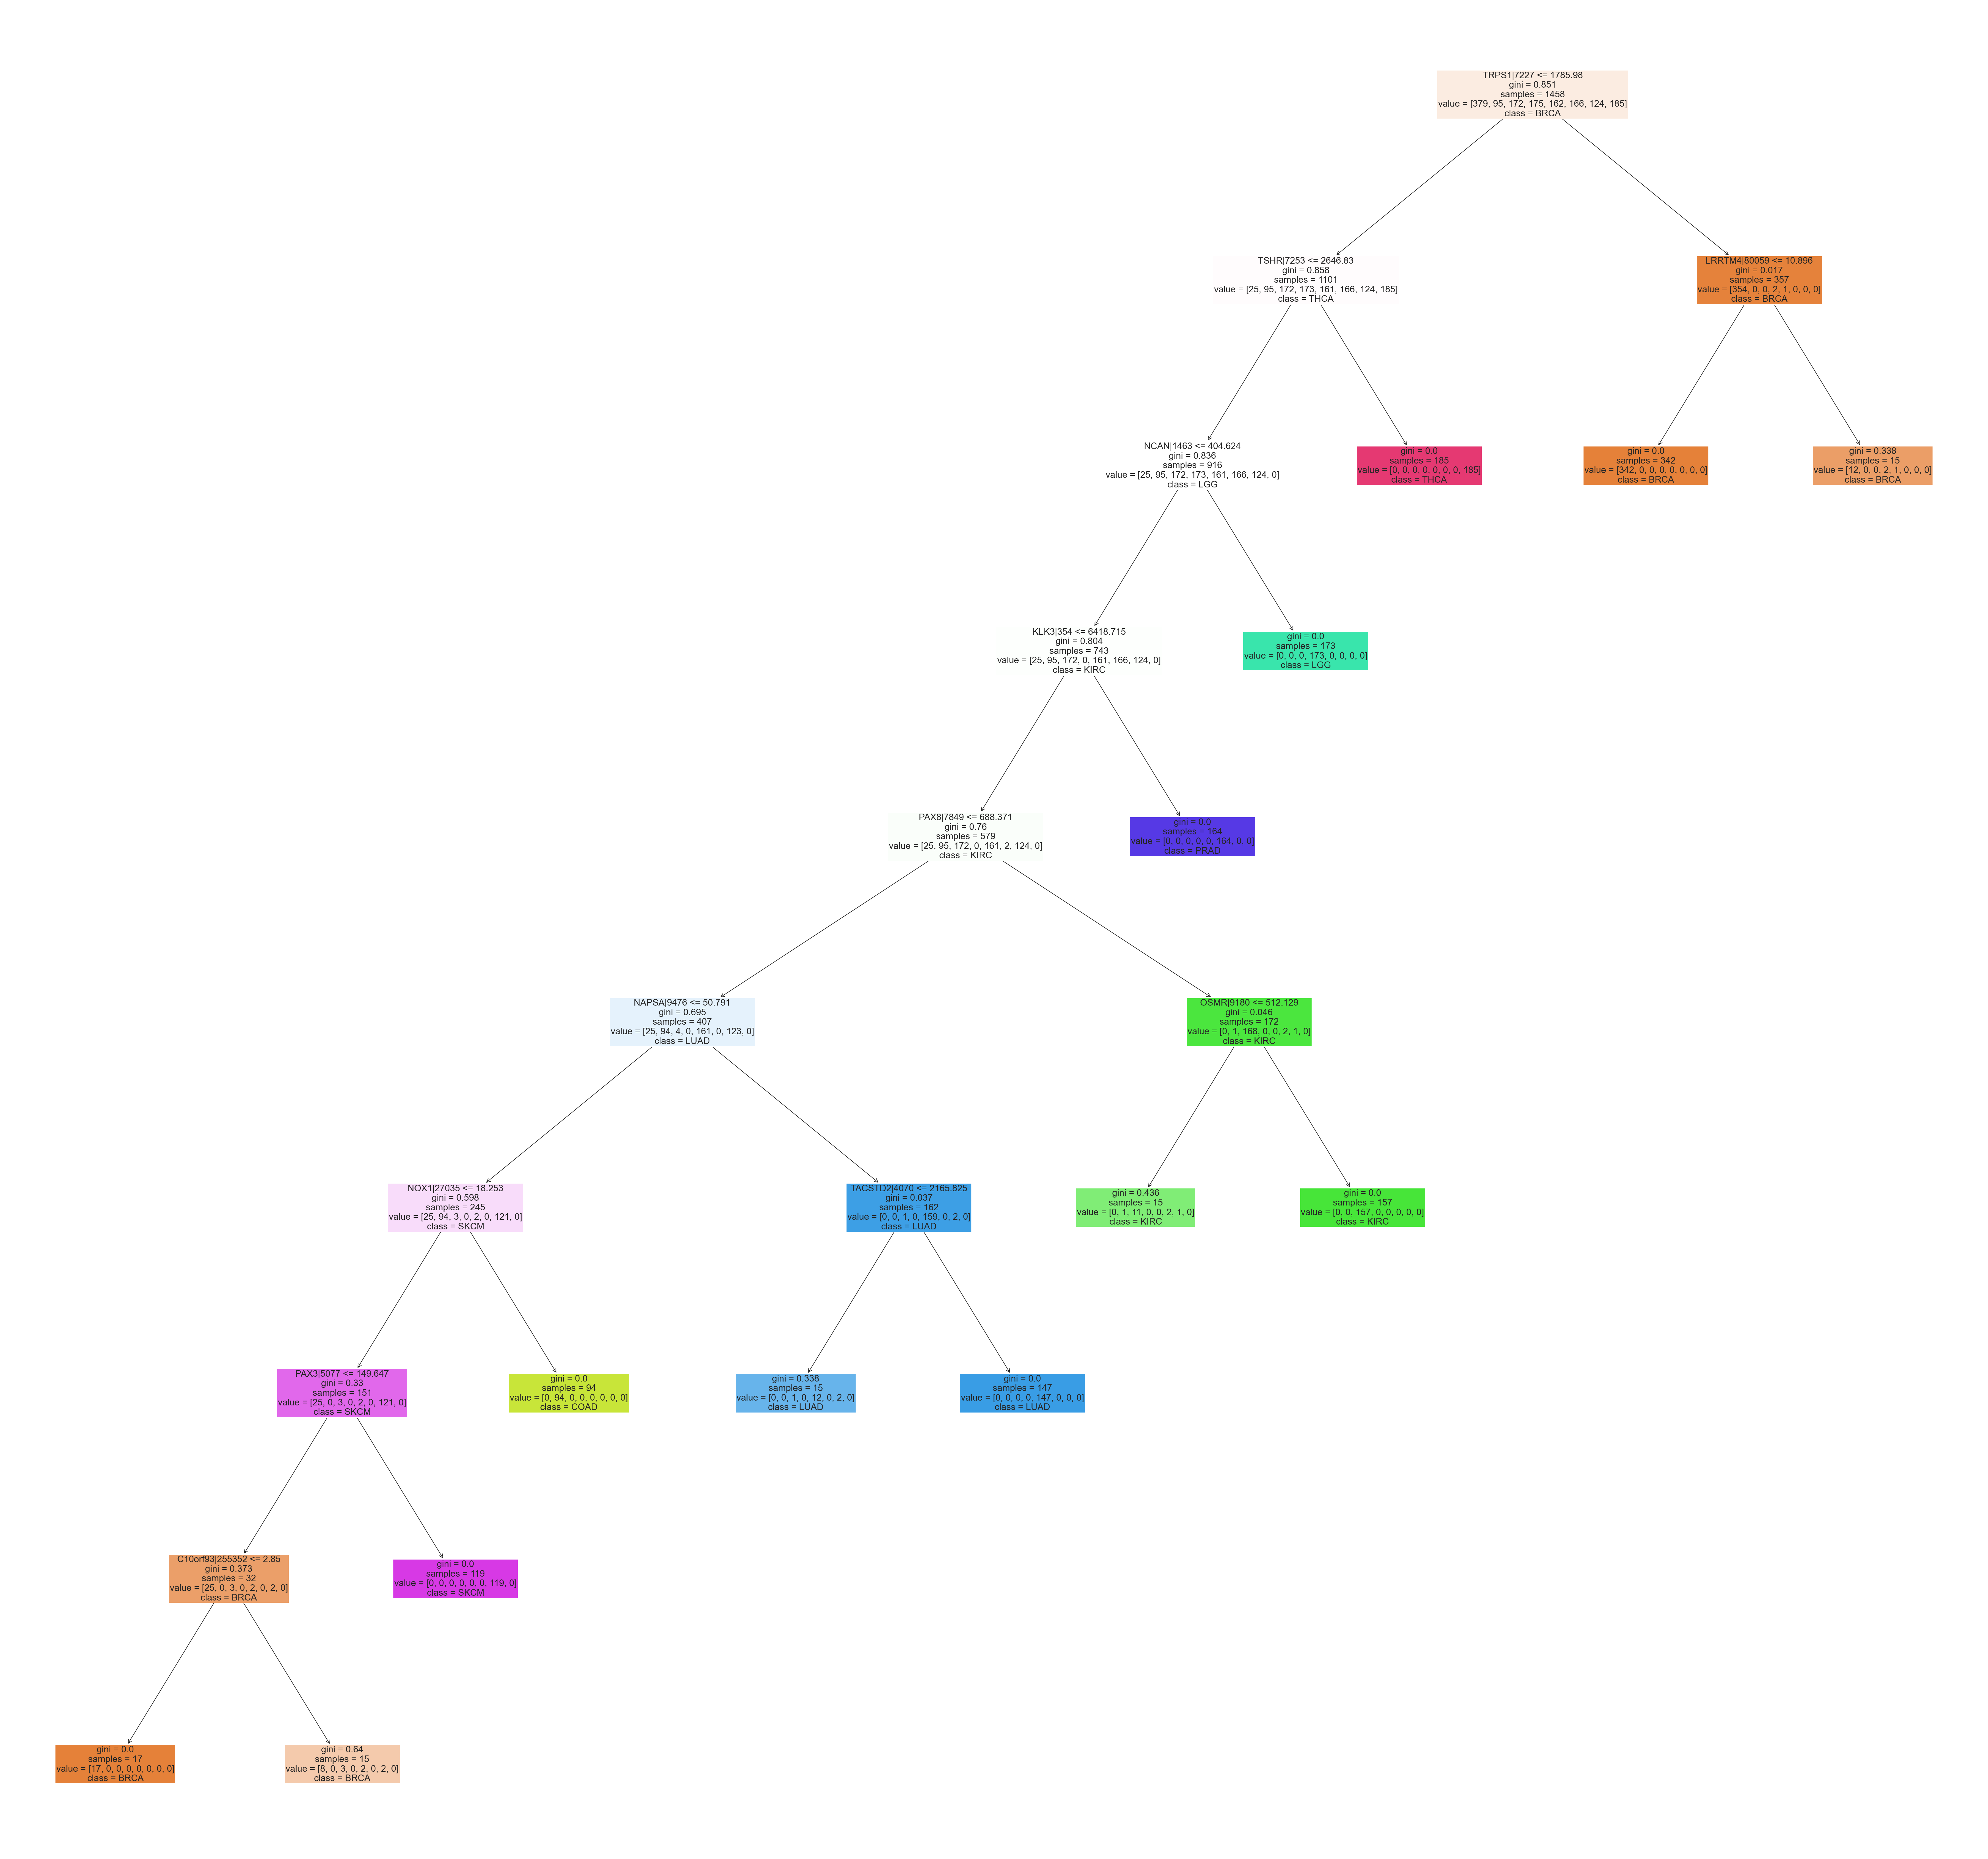

In [44]:
# plt.rcParams['font.size'] = 32
fig = plt.figure(figsize=(125,120))
_ = tree.plot_tree(dtree, 
                   feature_names=unc_mix_small.columns,  
                   class_names=ulabels,
                   filled=True, 
                   fontsize=32)

In [45]:
dtree_a = accuracy_score(y_test, dtree_y_pred)
dtree_a

0.9835390946502057

In [46]:
dtree_r = sklearn.metrics.confusion_matrix(y_test, dtree_y_pred)
dtree_r

array([[118,   0,   0,   0,   0,   0,   0,   0],
       [  0,  25,   1,   0,   0,   0,   0,   0],
       [  1,   0,  59,   0,   0,   0,   0,   0],
       [  0,   0,   0,  48,   0,   0,   0,   1],
       [  0,   1,   1,   0,  62,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58,   0,   0],
       [  1,   0,   0,   0,   2,   0,  41,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [47]:
y_train.info

<bound method Series.info of TCGA-B6-A0X0-01A-21R-A115-07    BRCA
TCGA-NH-A50V-01A-11R-A28H-07    COAD
TCGA-BP-4993-01A-02R-1420-07    KIRC
TCGA-S9-A7IQ-01A-21R-A34F-07     LGG
TCGA-A3-3335-01A-01R-0864-07    KIRC
                                ... 
TCGA-75-7031-01A-11R-1949-07    LUAD
TCGA-DU-5853-01A-11R-1896-07     LGG
TCGA-AZ-6600-01A-11R-1774-07    COAD
TCGA-HC-7079-01A-11R-1965-07    PRAD
TCGA-DJ-A3UP-01A-11R-A22L-07    THCA
Name: label, Length: 1458, dtype: object>

In [48]:
print(classification_report(y_test, dtree_y_pred))

              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99       118
        COAD       0.96      0.96      0.96        26
        KIRC       0.97      0.98      0.98        60
         LGG       1.00      0.98      0.99        49
        LUAD       0.97      0.97      0.97        64
        PRAD       1.00      1.00      1.00        58
        SKCM       1.00      0.93      0.96        44
        THCA       0.99      1.00      0.99        67

    accuracy                           0.98       486
   macro avg       0.98      0.98      0.98       486
weighted avg       0.98      0.98      0.98       486



### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfm = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=101, 
                             max_features=None, min_samples_leaf=30)
rfm.fit(X_train, y_train)
rfm_y_pred = rfm.predict(X_test)

In [51]:
rfm_a = accuracy_score(y_test, rfm_y_pred)
rfm_a

0.9917695473251029

In [52]:
rfm_r = sklearn.metrics.confusion_matrix(y_test, rfm_y_pred)
rfm_r

array([[118,   0,   0,   0,   0,   0,   0,   0],
       [  0,  26,   0,   0,   0,   0,   0,   0],
       [  0,   0,  60,   0,   0,   0,   0,   0],
       [  0,   0,   0,  48,   0,   0,   0,   1],
       [  0,   0,   1,   0,  63,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58,   0,   0],
       [  0,   0,   0,   0,   2,   0,  42,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [53]:
print(classification_report(y_test, rfm_y_pred))

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       118
        COAD       1.00      1.00      1.00        26
        KIRC       0.98      1.00      0.99        60
         LGG       1.00      0.98      0.99        49
        LUAD       0.97      0.98      0.98        64
        PRAD       1.00      1.00      1.00        58
        SKCM       1.00      0.95      0.98        44
        THCA       0.99      1.00      0.99        67

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



In [54]:
## get feature importance:
## Feature importance based on mean decrease in impurity
## Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
## Warning Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

start_time = time.time()
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.039 seconds


C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_4992\1931120958.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


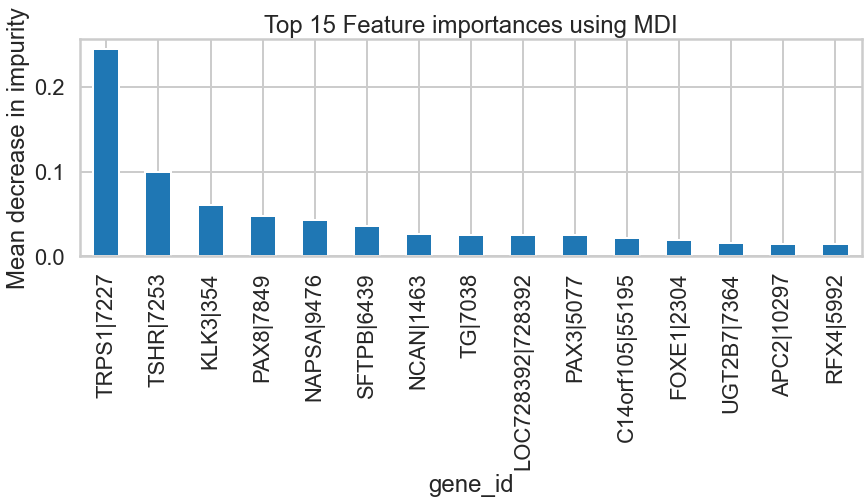

In [55]:
# Let’s plot the impurity-based importance: 
## Feature importance based on mean decrease in impurity
## Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
## Warning Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

gene_importances = pd.Series(importances, index=unc_mix_small.columns)
top15 = gene_importances.nlargest(n=15)
fig, ax = plt.subplots()
top15.plot.bar( ax=ax)
ax.set_title("Top 15 Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# Key Summaey: Top 10 Genes Among the 8 Cancer Classes Uncovered by Feature Importances: 
>#### 1. TRPS1 - [Expression in Breast Carcinomas: Focusing on Metaplastic Breast Carcinomas.](https://pubmed.ncbi.nlm.nih.gov/35175968/#:~:text=The%20results%20showed%20TRPS1%20was,higher%20than%20GATA3%20(55.2%25)).
>#### 2. TSHR  - [thyroid stimulating hormone receptor. Somatic mutations in the TSHR gene have been identified in thyroid tumors. These mutations are found only in the tumor cells.](https://medlineplus.gov/genetics/gene/tshr/#conditions)
>#### 3. KLK3  - [used in the diagnosis and monitoring of prostate cancer. Elevated PSA levels are seen in some breast and gynecologic cancers.](http://www.cancerindex.org/geneweb/KLK3.htm)
>#### 4. PAX8 - [Overall, PAX8 is expressed in primary and metastatic pancreatic well-differentiated neuroendocrine tumors, enabling reliable differentiation between pancreatic and ileal and pulmonary well-differentiated neuroendocrine tumors using immunostaining methods.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576179/#:~:text=Overall%2C%20PAX8%20is%20expressed%20in,neuroendocrine%20tumors%20using%20immunostaining%20methods).
>#### 5. NAPSA - [Diseases associated with NAPSA include Ovarian Clear Cell Adenofibroma and Adenocarcinoma.](https://www.genecards.org/cgi-bin/carddisp.pl?gene=NAPSA)
>#### 6. SFTPB - [This gene encodes the pulmonary-associated surfactant protein B (SPB), an amphipathic surfactant protein essential for lung function and homeostasis after birth.](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SFTPB); [Pro–Surfactant Protein B As a Biomarker for Lung Cancer Prediction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3871515/)
>#### 7. NCAN - [Diseases associated with NCAN include Bipolar Disorder and Schizophrenia.](https://www.genecards.org/cgi-bin/carddisp.pl?gene=NCAN)
>#### 8. TG - [The TG gene provides instructions for making a protein called thyroglobulin, one of the largest proteins in the body. This protein is found only in the thyroid gland, a butterfly-shaped tissue in the lower neck.](https://medlineplus.gov/genetics/gene/tg/) [Mutations within the Tg gene cause defective thyroid hormone synthesis, resulting in congenital hypothyroidism. Thyroid carcinoma may develop from dyshormonogenic goiters due to Tg mutation.](https://pubmed.ncbi.nlm.nih.gov/18060877/#:~:text=Mutations%20within%20the%20Tg%20gene,goiters%20due%20to%20Tg%20mutation).
>#### 9. __*LOC728392*__ - [The genomic region with the most differentially methylated sites (LOC728392) does not have a defined function, but does have predicted gene coding regions and an identified CpG island. Figure 4 plots 8 out of 27 CpG sites examined across 776 bps of a CpG island that all have higher methylation in high-risk tumors.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4100249/)
>#### 10. PAX3 - [Rearrangements of genetic material involving the PAX3 gene are associated with a cancer of muscle tissue called alveolar rhabdomyosarcoma, which typically affects adolescents and young adults.](https://medlineplus.gov/genetics/gene/pax3/#conditions)
### Cancer Class Symbols and Description:
>#### 1. BRCA: Breast invasive carcinoma
>#### 2. COAD: Colon adenocarcinoma
>#### 3. KIRC: Kidney renal clear cell carcinoma
>#### 4. LUAD: Lung adenocarcinoma
>#### 5. PRAD: Prostate adenocarcinoma
>#### 6. SKCM: Skin Cutaneous Melanoma
>#### 7. THCA: Thyroid carcinoma
>#### 8. LGG: Brain Lower Grade Glioma 

### Support Vector Machine

In [56]:
from sklearn.svm import SVC

In [57]:
svm = SVC(kernel="linear", C=0.025, random_state=101)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

In [58]:
svm_a = accuracy_score(y_test, svm_y_pred)
svm_a

0.9958847736625515

In [59]:
svm_r = sklearn.metrics.confusion_matrix(y_test, svm_y_pred)
svm_r

array([[118,   0,   0,   0,   0,   0,   0,   0],
       [  0,  26,   0,   0,   0,   0,   0,   0],
       [  0,   0,  60,   0,   0,   0,   0,   0],
       [  0,   0,   0,  49,   0,   0,   0,   0],
       [  1,   0,   0,   0,  63,   0,   0,   0],
       [  0,   0,   0,   0,   0,  58,   0,   0],
       [  1,   0,   0,   0,   0,   0,  43,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [60]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99       118
        COAD       1.00      1.00      1.00        26
        KIRC       1.00      1.00      1.00        60
         LGG       1.00      1.00      1.00        49
        LUAD       1.00      0.98      0.99        64
        PRAD       1.00      1.00      1.00        58
        SKCM       1.00      0.98      0.99        44
        THCA       1.00      1.00      1.00        67

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



# Conclusion:
## For the traditiona machine learning models for this application (without hyperparameters optimization), the order of accuracy are:   
1. Support Vector Machine (0.9958847736625515)
2. Stochastic Gradient Descent (0.9938271604938271), 
3. Random Forest (0.9917695473251029),
3. Naïve Bayes   (0.9917695473251029), 
5. Decision Tree (0.9835390946502057), 
6. K-Nearest Neighbours (0.9506172839506173)

## Hyperparameter tuning:

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
def print_results(results):
    print('Best Params: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print( '{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))

In [63]:
svm_hp = SVC(random_state=101)
svm_parameters = { 
    'kernel': ['linear', 'poly'],
    'C': [0.025, 5]
    # 'degree': [2, 3] ## only for ploy kernel
}
svm_cv = GridSearchCV(svm_hp, svm_parameters, cv=5)
svm_cv.fit(X_train, y_train)
print_results(svm_cv)

Best Params: {'C': 0.025, 'kernel': 'linear'}

0.986 (+/-0.012) for {'C': 0.025, 'kernel': 'linear'}
0.417 (+/-0.04) for {'C': 0.025, 'kernel': 'poly'}
0.986 (+/-0.012) for {'C': 5, 'kernel': 'linear'}
0.962 (+/-0.022) for {'C': 5, 'kernel': 'poly'}
